___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Example for Sine Wave

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

## Data

Let's use Numpy to create a simple sine wave

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [5]:
x[:50]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [6]:
y[:25]

array([0.        , 0.09983342, 0.19866933, 0.29552021, 0.38941834,
       0.47942554, 0.56464247, 0.64421769, 0.71735609, 0.78332691,
       0.84147098, 0.89120736, 0.93203909, 0.96355819, 0.98544973,
       0.99749499, 0.9995736 , 0.99166481, 0.97384763, 0.94630009,
       0.90929743, 0.86320937, 0.8084964 , 0.74570521, 0.67546318])

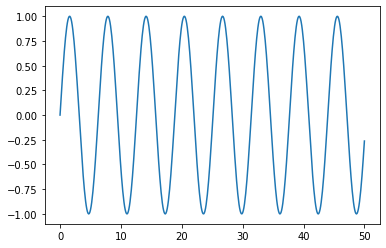

In [7]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [8]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [9]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


## Train Test Split

Note! This is very different from our usual split methodology!

In [10]:
len(df)

501

In [11]:
test_percent = 0.1

In [12]:
len(df)*test_percent

50.1

In [13]:
test_point = np.round(len(df)*test_percent)
test_point

50.0

In [15]:
test_index = int(len(df) - test_point)
test_index

451

In [16]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [18]:
train.tail()

,Sine
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208
45.0,0.850904


In [19]:
test.head()

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


## Scale Data

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

Ignore warning, it's just converting to floats.
We only fit to train data, otherwise we are cheating assuming info about test set.

In [22]:
train.max()

Sine    0.999994
dtype: float64

In [25]:
train.mean()

Sine    0.01146
dtype: float64